# **Soil Moisture Prediction Project**
### *Harnessing Data to Enable Smarter Precision Farming*

---

## **Introduction**

Efficient water management is a cornerstone of precision farming, especially in resource-scarce environments. This project focuses on developing a predictive model to estimate soil moisture levels at unsensed field locations using limited sensor data. By leveraging machine learning techniques, we aim to reduce dependency on extensive soil moisture sensors, making precision farming more cost-effective and scalable.

---

## **Key Objectives**
1. Predict soil moisture levels at unsensed points using data from central sensors.
2. Enhance irrigation planning with accurate, real-time soil moisture estimates.
3. Minimize hardware costs by optimizing sensor deployment across fields.

---

## **Key Deliverables**
- A trained and validated soil moisture prediction model.
- Interactive visualizations to explain insights and trends.
- A deployment-ready pipeline for real-time applications.
- Comprehensive documentation of methodologies and results.

---

### **Notebook Structure**
This notebook is organized into the following sections:
1. **Data Collection and Preprocessing** - Preparing the dataset for analysis.
2. **Feature Engineering** - Extracting meaningful features for improved prediction accuracy.
3. **Model Development** - Training, evaluating, and fine-tuning regression models.
4. **Visualization and Insights** - Exploring predictions with clear visualizations.
5. **Real-Time Application** - Preparing the model for real-world deployment.

---

**Let’s get started! 🚀**


## Importing Libraries


In [ ]:

# Core Libraries

import numpy as np
import pandas as pd

# Visualization

import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# Machine Learning

## Preprocessing Libraries
from sklearn.model_selection import train_test_split,cross_val_score,KFold

## Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

## Model Evaluation
from sklearn.metrics import mean_squared_error, r2_score


# Warnings
import warnings
warnings.filterwarnings('ignore')


# Data Loading And Exploration

In [ ]:
data_df = pd.read_csv('LEANS 8.csv',
    skiprows=5,
    names=["timestamp", "volumetric_water_content[%]", "vwc_raw[V]", "battery[V]"])

In [ ]:
data_df.head()

,timestamp,volumetric_water_content[%],vwc_raw[V],battery[V]
0,11/16/2024 00:02:19,18.48,1.374,4.08
1,11/16/2024 00:07:23,18.48,1.374,4.1
2,11/16/2024 00:12:27,18.48,1.374,4.11
3,11/16/2024 00:17:32,18.6,1.376,4.1
4,11/16/2024 00:22:36,18.48,1.374,4.11


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1136 entries, 0 to 1135
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   timestamp                    1136 non-null   object
 1   volumetric_water_content[%]  1136 non-null   object
 2   vwc_raw[V]                   1136 non-null   object
 3   battery[V]                   1136 non-null   object
dtypes: object(4)
memory usage: 35.6+ KB


In [ ]:
data_df.describe()


,timestamp,volumetric_water_content[%],vwc_raw[V],battery[V]
count,1136,1136,1136,1136
unique,1136,206,184,13
top,11/16/2024 00:02:19,5.61,1.376,4.05
freq,1,73,95,160


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1136 entries, 0 to 1135
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   timestamp                    1136 non-null   object
 1   volumetric_water_content[%]  1136 non-null   object
 2   vwc_raw[V]                   1136 non-null   object
 3   battery[V]                   1136 non-null   object
dtypes: object(4)
memory usage: 35.6+ KB


## Data Cleaning And EDA

### Setting Time



In [ ]:
data_df['timestamp'] = pd.to_datetime(data_df['timestamp'])

In [ ]:
data_df['volumetric_water_content[%]']= pd.to_numeric(data_df['volumetric_water_content[%]'], errors='coerce')

In [ ]:
data_df.drop(columns=['vwc_raw[V]','battery[V]'],inplace=True)

In [ ]:
# Function to Filter Data by Time Range
def filter_data_by_time(data, start_time, end_time):
    start_time = pd.to_datetime(start_time)
    end_time = pd.to_datetime(end_time)
    return data[(data['timestamp'] >= start_time) & (data['timestamp'] <= end_time)]

# Define Time Intervals
time_ranges = {
    "df_1": ('2024-11-16 14:55:00', '2024-11-17 14:55:00'),
    "df_2": ('2024-11-17 15:45:00', '2024-11-18 15:45:00'),
    "df_3": ('2024-11-18 19:02:00', '2024-11-19 19:02:00'),
}

# Filter Data and Store in Individual DataFrames
df_1, df_2, df_3 = [
    filter_data_by_time(data_df, start, end) for start, end in time_ranges.values()
]


In [ ]:
print(f'The Number of Columns and rows in df1 :{df_1.shape}')

df_1.head(3)

The Number of Columns and rows in df1 :(284, 2)


,timestamp,volumetric_water_content[%]
176,2024-11-16 14:57:41,22.84
177,2024-11-16 15:02:45,20.86
178,2024-11-16 15:07:49,20.01


### df_1 Cleaning

In [ ]:
df_1.isna().sum()

,0
timestamp,0
volumetric_water_content[%],0


In [ ]:
px.box(df_1,x='volumetric_water_content[%]', color_discrete_sequence=['Green'])

### df_2 Cleaning


In [ ]:
df_2.isna().sum()

,0
timestamp,0
volumetric_water_content[%],1


In [ ]:

px.box(df_2, x='volumetric_water_content[%]', color_discrete_sequence=['red'])


In [ ]:
df_2[df_2['volumetric_water_content[%]'].isnull()]

,timestamp,volumetric_water_content[%]
753,2024-11-18 15:40:21,NaN


In [ ]:
df_2.loc[743:753]

,timestamp,volumetric_water_content[%]
743,2024-11-18 14:49:42,9.60
744,2024-11-18 14:54:46,9.60
745,2024-11-18 14:59:50,9.60
746,2024-11-18 15:04:54,9.60
747,2024-11-18 15:09:58,9.60
748,2024-11-18 15:15:03,9.58
749,2024-11-18 15:20:04,9.60
750,2024-11-18 15:25:08,9.60
751,2024-11-18 15:30:13,9.60
752,2024-11-18 15:35:17,9.60


In [ ]:
df_2.fillna(method='ffill', inplace=True)

In [ ]:
df_2.isna().sum()

,0
timestamp,0
volumetric_water_content[%],0


### df_3 Cleaning

In [ ]:
df_3.isna().sum()

,0
timestamp,0
volumetric_water_content[%],2


In [ ]:
df_3[df_3['volumetric_water_content[%]'].isnull()]

,timestamp,volumetric_water_content[%]
798,2024-11-18 19:28:16,NaN
1011,2024-11-19 13:27:03,NaN


In [ ]:
surrounding_values1 = df_3.loc[796:801]
surrounding_values1

,timestamp,volumetric_water_content[%]
796,2024-11-18 19:18:08,5.35
797,2024-11-18 19:23:12,5.35
798,2024-11-18 19:28:16,NaN
799,2024-11-18 19:33:24,5.38
800,2024-11-18 19:38:25,5.38
801,2024-11-18 19:43:29,5.38


In [ ]:
mean1 = surrounding_values1['volumetric_water_content[%]'].mean()
mean1

5.367999999999999

In [ ]:
df_3.loc[799, 'volumetric_water_content[%]'] = mean1

In [ ]:
surrounding_values2 = df_3.loc[1006:1014]
surrounding_values2

,timestamp,volumetric_water_content[%]
1006,2024-11-19 13:01:44,5.66
1007,2024-11-19 13:06:49,5.61
1008,2024-11-19 13:11:50,5.63
1009,2024-11-19 13:16:55,5.61
1010,2024-11-19 13:21:59,5.61
1011,2024-11-19 13:27:03,NaN
1012,2024-11-19 13:32:11,5.61
1013,2024-11-19 13:37:15,5.61
1014,2024-11-19 13:42:15,5.63


In [ ]:
df_3.fillna(method='ffill', inplace=True)

In [ ]:
px.box(df_3, x='volumetric_water_content[%]', color_discrete_sequence=['Black'])

In [ ]:
print(f'The Number of Columns and rows in df3 :{df_3.shape}')

df_3.head(3)

The Number of Columns and rows in df3 :(285, 2)


,timestamp,volumetric_water_content[%]
793,2024-11-18 19:02:56,5.33
794,2024-11-18 19:08:00,5.35
795,2024-11-18 19:13:04,5.35


In [ ]:
print(f'The Number of Columns and rows in df2 :{df_2.shape}')

df_2.head(3)

The Number of Columns and rows in df2 :(284, 2)


,timestamp,volumetric_water_content[%]
470,2024-11-17 15:46:54,8.36
471,2024-11-17 15:51:59,11.26
472,2024-11-17 15:57:03,11.55


# Feature Engineering

## Calibration of Time

In [ ]:
df_1.columns


Index(['timestamp', 'volumetric_water_content[%]'], dtype='object')

In [ ]:
# Aligning Timestamps for Consistency

for df in [df_1, df_2, df_3]:
    df['time_min'] = [i * 5 for i in range(len(df))]

In [ ]:

# Removing timestamp column

for df in [df_1, df_2, df_3]:
    df.drop(columns=['timestamp'], inplace=True)

In [ ]:
df_2.sample(1)

,volumetric_water_content[%],time_min
525,10.35,275


In [ ]:
df_2.sample(1)

,volumetric_water_content[%],time_min
637,9.81,835


In [ ]:
df_3.sample(1)

,volumetric_water_content[%],time_min
1028,5.63,1175


## Calibration of Soil Moisture

In [ ]:
df=pd.merge(df_1,df_2,on='time_min',how='inner')

In [ ]:
df=pd.merge(df,df_3,on='time_min',how='inner')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   volumetric_water_content[%]_x  284 non-null    float64
 1   time_min                       284 non-null    int64  
 2   volumetric_water_content[%]_y  284 non-null    float64
 3   volumetric_water_content[%]    284 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 9.0 KB


In [ ]:
df.head()

,volumetric_water_content[%]_x,time_min,volumetric_water_content[%]_y,volumetric_water_content[%]
0,22.84,0,8.36,5.33
1,20.86,5,11.26,5.35
2,20.01,10,11.55,5.35
3,19.69,15,11.61,5.35
4,19.45,20,11.61,5.35


In [ ]:
df= df[['time_min','volumetric_water_content[%]_x','volumetric_water_content[%]_y','volumetric_water_content[%]']]

In [ ]:
df.head()

,time_min,volumetric_water_content[%]_x,volumetric_water_content[%]_y,volumetric_water_content[%]
0,0,22.84,8.36,5.33
1,5,20.86,11.26,5.35
2,10,20.01,11.55,5.35
3,15,19.69,11.61,5.35
4,20,19.45,11.61,5.35


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   time_min                       284 non-null    int64  
 1   volumetric_water_content[%]_x  284 non-null    float64
 2   volumetric_water_content[%]_y  284 non-null    float64
 3   volumetric_water_content[%]    284 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 9.0 KB


In [ ]:
df1=df.copy()

In [ ]:
df1 = df1.rename(columns={'time_min': 'Time(Min)', 'volumetric_water_content[%]_x':'Moisture-1','volumetric_water_content[%]_y':'Moisture-2','volumetric_water_content[%]':'Moisture-3'})

In [ ]:
df1.columns

Index(['Time(Min)', 'Moisture-1', 'Moisture-2', 'Moisture-3'], dtype='object')

In [ ]:
df1.head()

,Time(Min),Moisture-1,Moisture-2,Moisture-3
0,0,22.84,8.36,5.33
1,5,20.86,11.26,5.35
2,10,20.01,11.55,5.35
3,15,19.69,11.61,5.35
4,20,19.45,11.61,5.35


In [ ]:
train_df, test_df = train_test_split(df1, test_size=0.2, random_state=42)

In [ ]:
train_df.head()


,Time(Min),Moisture-1,Moisture-2,Moisture-3
268,1340,16.93,9.60,5.61
25,125,19.08,10.96,5.40
86,430,18.60,10.11,5.56
144,720,17.89,9.88,5.59
137,685,18.00,9.91,5.59


In [ ]:
moisture_means = train_df[['Moisture-1', 'Moisture-2', 'Moisture-3']].mean()

In [ ]:
# Calibrating the Moisture with their  respective mean

for col in ['Moisture-1', 'Moisture-2', 'Moisture-3']:
    train_df[col] = train_df[col] - moisture_means[col]
    test_df[col] = test_df[col] - moisture_means[col]

In [ ]:
train_df.head()

,Time(Min),Moisture-1,Moisture-2,Moisture-3
268,1340,-1.125903,-0.444626,0.05163
25,125,1.024097,0.915374,-0.15837
86,430,0.544097,0.065374,0.00163
144,720,-0.165903,-0.164626,0.03163
137,685,-0.055903,-0.134626,0.03163


## Data Visualization

In [ ]:
# Visualizing the complete df

df3=df1.copy() ## Contains train and test df

for col in ['Moisture-1', 'Moisture-2', 'Moisture-3']:
    df3[col] = df3[col] - moisture_means[col]

fig = px.line(df3, x='Time(Min)', y=['Moisture-1', 'Moisture-2', 'Moisture-3'],
              title='Soil Moisture Levels Over Time at Different points',
              labels={'Time(Min)': 'Time (Minutes)', 'value': 'Volumetric Water Content (%)', 'variable': 'Sensor'})
fig.show()

In [ ]:
fig = px.box(
    df3,
    y=['Moisture-1', 'Moisture-2', 'Moisture-3'],
    labels={'variable': 'Moisture Type', 'value': 'Moisture Level'},
    title='Distribution of Moisture Levels',
    color_discrete_sequence=px.colors.qualitative.Pastel1
      )
fig.update_layout(legend_title_text='Moisture Type')
fig.show()


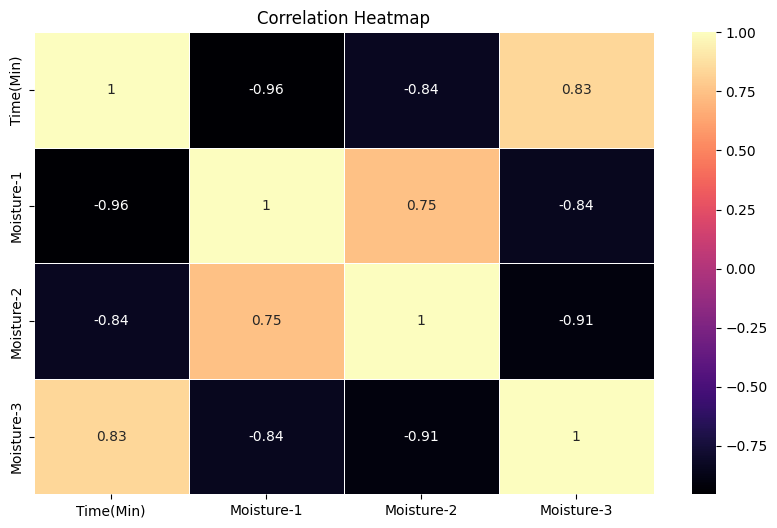

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df3.corr(), annot=True, cmap='magma', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Moving averages smooth out short-term fluctuations in moisture levels, making it easier to identify long-term trends. This helps in tracking consistent patterns for better decision-making in applications like agriculture or industrial processes.

In [ ]:
# Calculate Moving Averages for Individual Moisture Levels
df3['Moisture-1 (Moving Avg)'] = df3['Moisture-1'].rolling(window=5).mean()
df3['Moisture-2 (Moving Avg)'] = df3['Moisture-2'].rolling(window=5).mean()
df3['Moisture-3 (Moving Avg)'] = df3['Moisture-3'].rolling(window=5).mean()

# Plot with Plotly
import plotly.graph_objects as go

fig = go.Figure()

# Moisture-1
fig.add_trace(go.Scatter(x=df3['Time(Min)'], y=df3['Moisture-1'], mode='lines', name='Moisture-1 (Original)', line=dict(color='blue', dash='dot')))
fig.add_trace(go.Scatter(x=df3['Time(Min)'], y=df3['Moisture-1 (Moving Avg)'], mode='lines', name='Moisture-1 (Moving Avg)', line=dict(color='blue')))

# Moisture-2
fig.add_trace(go.Scatter(x=df3['Time(Min)'], y=df3['Moisture-2'], mode='lines', name='Moisture-2 (Original)', line=dict(color='orange', dash='dot')))
fig.add_trace(go.Scatter(x=df3['Time(Min)'], y=df3['Moisture-2 (Moving Avg)'], mode='lines', name='Moisture-2 (Moving Avg)', line=dict(color='orange')))

# Moisture-3
fig.add_trace(go.Scatter(x=df3['Time(Min)'], y=df3['Moisture-3'], mode='lines', name='Moisture-3 (Original)', line=dict(color='green', dash='dot')))
fig.add_trace(go.Scatter(x=df3['Time(Min)'], y=df3['Moisture-3 (Moving Avg)'], mode='lines', name='Moisture-3 (Moving Avg)', line=dict(color='green')))

# Update layout
fig.update_layout(
    title='Time vs. Moisture Levels with Moving Average',
    xaxis_title='Time (Min)',
    yaxis_title='Moisture Levels',
    legend_title='Legend',
    template='plotly_white'
)

fig.show()


In [ ]:
from plotly.subplots import make_subplots

# Create Subplots
fig = make_subplots(
    rows=3, cols=1,
    shared_xaxes=True,  # Share x-axis across subplots
    vertical_spacing=0.1,
    subplot_titles=('Moisture-1', 'Moisture-2', 'Moisture-3')
)

# Add Moisture-1
fig.add_trace(
    go.Scatter(x=df3['Time(Min)'], y=df3['Moisture-1'], mode='lines', name='Moisture-1', line=dict(color='blue')),
    row=1, col=1
)

# Add Moisture-2
fig.add_trace(
    go.Scatter(x=df3['Time(Min)'], y=df3['Moisture-2'], mode='lines', name='Moisture-2', line=dict(color='orange')),
    row=2, col=1
)

# Add Moisture-3
fig.add_trace(
    go.Scatter(x=df3['Time(Min)'], y=df3['Moisture-3'], mode='lines', name='Moisture-3', line=dict(color='green')),
    row=3, col=1
)

# Update Layout
fig.update_layout(
    height=800,  # Set the figure height
    title='Moisture Levels Over Time (df3)',
    xaxis_title='Time (Min)',
    yaxis_title='Moisture Levels',
    showlegend=False,  # Disable legend since titles are used
    template='plotly_white'
)

# Show Figure
fig.show()


**Comparison of Moisture Levels (Stacked Area Plot)**

A stacked area plot provides a clear visualization of how moisture levels contribute to the total moisture over time, showing cumulative effects.

In [ ]:
# Stacked Area Plot for Moisture Levels
fig = go.Figure()

# Add Moisture-1
fig.add_trace(go.Scatter(
    x=df3['Time(Min)'], y=df3['Moisture-1'],
    mode='lines', name='Moisture-1',
    stackgroup='one', line=dict(color='blue')
))

# Add Moisture-2
fig.add_trace(go.Scatter(
    x=df3['Time(Min)'], y=df3['Moisture-2'],
    mode='lines', name='Moisture-2',
    stackgroup='one', line=dict(color='orange')
))

# Add Moisture-3
fig.add_trace(go.Scatter(
    x=df3['Time(Min)'], y=df3['Moisture-3'],
    mode='lines', name='Moisture-3',
    stackgroup='one', line=dict(color='green')
))

# Update Layout
fig.update_layout(
    title='Stacked Area Plot of Moisture Levels (df3)',
    xaxis_title='Time (Min)',
    yaxis_title='Moisture Levels',
    legend_title='Moisture Types',
    template='plotly_white'
)

fig.show()


In [ ]:
# # Violin Plot for Moisture Levels in df3
# fig = px.violin(
#     df3.melt(id_vars=['Time(Min)'], value_vars=['Moisture-1', 'Moisture-2', 'Moisture-3'],
#              var_name='Moisture Type', value_name='Moisture Level'),
#     x='Moisture Type',
#     y='Moisture Level',
#     color='Moisture Type',
#     box=True,  # Add a box plot inside the violin
#     points='all',  # Show all individual points
#     title='Violin Plot of Moisture Levels (df3)',
#     template='plotly_white'
# )

# # Update layout
# fig.update_layout(
#     xaxis_title='Moisture Type',
#     yaxis_title='Moisture Level',
#     legend_title='Moisture Type'
# )

# fig.show()


In [ ]:
# # 3D Scatter Plot for Moisture Levels
# fig = px.scatter_3d(
#     df3,
#     x='Moisture-1',
#     y='Moisture-2',
#     z='Moisture-3',
#     color='Time(Min)',
#     title='3D Scatter Plot of Moisture Levels',
#     labels={
#         'Moisture-1': 'Moisture-1',
#         'Moisture-2': 'Moisture-2',
#         'Moisture-3': 'Moisture-3',
#         'Time(Min)': 'Time (Min)'
#     },
#     template='plotly_white'
# )

# # Update layout
# fig.update_layout(
#     scene=dict(
#         xaxis_title='Moisture-1',
#         yaxis_title='Moisture-2',
#         zaxis_title='Moisture-3'
#     )
# )

# fig.show()


## Distance

In [ ]:
## Euclidean Distance
center = (11, 8)
point1 = (13.5, 10.5)  # Corresponds to Moisture-2
point2 = (16, 12)      # Corresponds to Moisture-3

def calculate_distance(coord1, coord2):
    return np.sqrt((coord2[0] - coord1[0])**2 + (coord2[1] - coord1[1])**2)

# Calculate distances
distance_to_point1 = calculate_distance(center, point1)
distance_to_point2 = calculate_distance(center, point2)

In [ ]:
train_df.head()

,Time(Min),Moisture-1,Moisture-2,Moisture-3
268,1340,-1.125903,-0.444626,0.05163
25,125,1.024097,0.915374,-0.15837
86,430,0.544097,0.065374,0.00163
144,720,-0.165903,-0.164626,0.03163
137,685,-0.055903,-0.134626,0.03163


# Model Development-1

### Model Selection

In [ ]:
train_df.head()

,Time(Min),Moisture-1,Moisture-2,Moisture-3
268,1340,-1.125903,-0.444626,0.05163
25,125,1.024097,0.915374,-0.15837
86,430,0.544097,0.065374,0.00163
144,720,-0.165903,-0.164626,0.03163
137,685,-0.055903,-0.134626,0.03163


In [ ]:
test_df.head()

,Time(Min),Moisture-1,Moisture-2,Moisture-3
9,45,1.144097,1.385374,-0.17837
253,1265,-1.005903,-0.444626,0.05163
157,785,-0.405903,-0.204626,0.03163
209,1045,-0.765903,-0.324626,0.07163
75,375,0.664097,0.105374,0.00163


In [ ]:
X_train=train_df[['Time(Min)', 'Moisture-1']]
y_train=train_df[['Moisture-2','Moisture-3']]

In [ ]:
X_test=test_df[['Time(Min)', 'Moisture-1']]
y_test=test_df[['Moisture-2','Moisture-2']]


In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100),
    #"Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42)
}
results = {}

In [ ]:
def get_cv_scores(model, X, y, scoring='neg_mean_squared_error'):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring=scoring)
    return cv_scores

for model_name, model in models.items():

    print(f"Cross-validation scores for {model_name}:")
    print('\n')
    mse_scores = -get_cv_scores(model, X_train, y_train, scoring='neg_mean_squared_error')
    r2_scores = get_cv_scores(model, X_train, y_train, scoring='r2')
    print(f"MSE scores: {mse_scores}")
    print(f"Mean MSE: {mse_scores.mean()}")
    print(f"Std MSE: {mse_scores.std()}")
    print(f"R-squared scores: {r2_scores}")
    print(f"Mean R-squared: {r2_scores.mean()}")
    print(f"Std R-squared: {r2_scores.std()}")
    print("-" * 40)
    print('\n')


Cross-validation scores for Linear Regression:


MSE scores: [0.05127959 0.04714992 0.01858615 0.02266745 0.15090443]
Mean MSE: 0.05811750793360314
Std MSE: 0.0481578500297779
R-squared scores: [0.72978175 0.71899462 0.77578391 0.69818396 0.28457833]
Mean R-squared: 0.6414645134557825
Std R-squared: 0.18024283517996872
----------------------------------------


Cross-validation scores for Decision Tree:


MSE scores: [0.00097609 0.00194348 0.0005     0.00043556 0.09429889]
Mean MSE: 0.019630801932367162
Std MSE: 0.03733793803969098
R-squared scores: [0.98491663 0.98305332 0.96888365 0.96796186 0.6503396 ]
Mean R-squared: 0.9110310120984956
Std R-squared: 0.13053302859758412
----------------------------------------


Cross-validation scores for Random Forest:


MSE scores: [0.00156472 0.00528905 0.00036141 0.00023962 0.10146982]
Mean MSE: 0.021784921724637696
Std MSE: 0.039884382897729255
R-squared scores: [0.98662447 0.97419862 0.97952681 0.97797001 0.62838389]
Mean R-squared: 0.909340

### Model training

In [ ]:

model = VotingRegressor(
    estimators=[
        ('DecisionTree', DecisionTreeRegressor(random_state=42)),
        ('RandomForest', RandomForestRegressor(random_state=42)),
        ('XGBoost', XGBRegressor(objective='reg:squarederror', random_state=42))
    ]

        )

mod1=model.fit(X_train, train_df['Moisture-2'])

mod2=model.fit(X_train, train_df['Moisture-3'])


test_df_with_preds = test_df.copy()

for col in ['Moisture-2', 'Moisture-3']:
    # Train the model
    model = model.fit(X_train, y_train[col])


    y_pred = model.predict(X_test)


    test_df_with_preds[f'Predicted-{col}'] = y_pred



In [ ]:
test_df_with_preds.sort_values(by='Time(Min)', inplace=True)

# Visualization and Insights


In [ ]:
test_df_with_preds[['Moisture-2', 'Predicted-Moisture-2', 'Moisture-3','Predicted-Moisture-3']].head()

,Moisture-2,Predicted-Moisture-2,Moisture-3,Predicted-Moisture-3
5,1.515374,1.535541,-0.20837,-0.205068
6,1.515374,1.528874,-0.19037,-0.193021
9,1.385374,1.415142,-0.17837,-0.178606
22,0.965374,1.024986,-0.15837,-0.159380
24,0.915374,1.001283,-0.15837,-0.158079


In [ ]:

fig = go.Figure()

# Add Moisture-2
fig.add_trace(go.Scatter(x=test_df_with_preds['Time(Min)'], y=test_df_with_preds['Moisture-2'],
                         mode='lines', name='Moisture-2', line=dict(color='blue')))

# Add Predicted Moisture-2
fig.add_trace(go.Scatter(x=test_df_with_preds['Time(Min)'], y=test_df_with_preds['Predicted-Moisture-2'],
                         mode='lines', name='Predicted Moisture-2', line=dict(color='red')))


# Update layout
fig.update_layout(
    title='Moisture-2 vs. Predicted Moisture-2 over Time',
    xaxis_title='Time (Min)',
    yaxis_title='Moisture Level',
    template='plotly_white'
)

fig.show()

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=test_df_with_preds['Time(Min)'], y=test_df_with_preds['Moisture-3'],
                         mode='lines', name='Moisture-3', line=dict(color='Green')))


fig.add_trace(go.Scatter(x=test_df_with_preds['Time(Min)'], y=test_df_with_preds['Predicted-Moisture-3'],
                         mode='lines', name='Predicted Moisture-3', line=dict(color='red')))


fig.update_layout(
    title='Moisture-3 vs. Predicted Moisture-3 over Time',
    xaxis_title='Time (Min)',
    yaxis_title='Moisture Level',
    template='plotly_white'
)

fig.show()

In [ ]:
real_test_moistures = pd.DataFrame()

real_test_moistures['Time(Min)']=test_df_with_preds['Time(Min)']

for col in ['Moisture-1','Moisture-2', 'Predicted-Moisture-2', 'Moisture-3','Predicted-Moisture-3']:
    if '2' in col:
        real_test_moistures[col]=test_df_with_preds[col]+moisture_means['Moisture-2']
    elif '3' in col:
        real_test_moistures[col]=test_df_with_preds[col]+moisture_means['Moisture-3']
    else:
        real_test_moistures[col]=test_df_with_preds[col]+moisture_means['Moisture-1']



In [ ]:
real_test_moistures.head()

,Time(Min),Moisture-1,Moisture-2,Predicted-Moisture-2,Moisture-3,Predicted-Moisture-3
5,25,19.32,11.56,11.580166,5.350,5.353302
6,30,19.26,11.56,11.573500,5.368,5.365349
9,45,19.20,11.43,11.459768,5.380,5.379765
22,110,19.33,11.01,11.069612,5.400,5.398990
24,120,19.20,10.96,11.045908,5.400,5.400291


# Real-Time Prediction

In [ ]:
def predict_moisture_2(time_min, moisture_1):
  moisture_1= moisture_1-moisture_means['Moisture-1']
  test_df = pd.DataFrame({'Time(Min)': [time_min], 'Moisture-1': [moisture_1]})
  moisture_2 = mod1.predict(test_df)  # mod1=model.fit(X_train, y_train['Moisture-2'])
  moisture_2= moisture_2+ moisture_means['Moisture-2']

  return moisture_2[0]

In [ ]:
predict_moisture_2(time_min=10, moisture_1=30)

9.827650434987872

In [ ]:
def predict_moisture_3(time_min, moisture_1):
  moisture_1= moisture_1-moisture_means['Moisture-1']
  test_df = pd.DataFrame({'Time(Min)': [time_min], 'Moisture-1': [moisture_1]})
  moisture_3 = mod2.predict(test_df)
  moisture_3= moisture_3+ moisture_means['Moisture-3']

  return moisture_3[0]

In [ ]:
predict_moisture_3(time_min=10, moisture_1=30)

5.341394928379941

# Model-2 Deployment

In [ ]:
data=df1.copy()
data.head()

,Time(Min),Moisture-1,Moisture-2,Moisture-3
0,0,22.84,8.36,5.33
1,5,20.86,11.26,5.35
2,10,20.01,11.55,5.35
3,15,19.69,11.61,5.35
4,20,19.45,11.61,5.35


In [ ]:
moisture_means = data[['Moisture-1', 'Moisture-2', 'Moisture-3']].mean()
moisture_means

,0
Moisture-1,18.042887
Moisture-2,10.044754
Moisture-3,5.558620


In [ ]:
# Calibrating the Moisture with their  respective mean

for col in ['Moisture-1', 'Moisture-2', 'Moisture-3']:
    data[col] = data[col] - moisture_means[col]

data.head()

,Time(Min),Moisture-1,Moisture-2,Moisture-3
0,0,4.797113,-1.684754,-0.22862
1,5,2.817113,1.215246,-0.20862
2,10,1.967113,1.505246,-0.20862
3,15,1.647113,1.565246,-0.20862
4,20,1.407113,1.565246,-0.20862


In [ ]:
center = (11, 8)
point1 = (13.5, 10.5)  # Corresponds to Moisture-2
point2 = (16, 12)      # Corresponds to Moisture-3

def calculate_distance(coord1, coord2):
    return np.sqrt((coord2[0] - coord1[0])**2 + (coord2[1] - coord1[1])**2)

# Calculate distances
distance_to_point2 = calculate_distance(center, point1)
distance_to_point3 = calculate_distance(center, point2)

In [ ]:
data['Distance_to_Center'] = 0
data['Distance_to_Point1'] = distance_to_point2
data['Distance_to_Point3'] = distance_to_point3
data.head()

,Time(Min),Moisture-1,Moisture-2,Moisture-3,Distance_to_Center,Distance_to_Point1,Distance_to_Point3
0,0,4.797113,-1.684754,-0.22862,0,3.535534,6.403124
1,5,2.817113,1.215246,-0.20862,0,3.535534,6.403124
2,10,1.967113,1.505246,-0.20862,0,3.535534,6.403124
3,15,1.647113,1.565246,-0.20862,0,3.535534,6.403124
4,20,1.407113,1.565246,-0.20862,0,3.535534,6.403124


In [ ]:

df_melted = pd.melt(data, id_vars=['Time(Min)', 'Moisture-1'], value_vars=['Moisture-2', 'Moisture-3'],
                    var_name='Moisture_Point', value_name='Predicted_Moisture')

# Now, let's add corresponding distances for each moisture point (i.e., Point 1 and Point 3)
df_melted['Distance'] = df_melted['Moisture_Point'].map({'Moisture-2': data['Distance_to_Point1'][0],
                                                         'Moisture-3': data['Distance_to_Point3'][0]})
df_melted.head()


,Time(Min),Moisture-1,Moisture_Point,Predicted_Moisture,Distance
0,0,4.797113,Moisture-2,-1.684754,3.535534
1,5,2.817113,Moisture-2,1.215246,3.535534
2,10,1.967113,Moisture-2,1.505246,3.535534
3,15,1.647113,Moisture-2,1.565246,3.535534
4,20,1.407113,Moisture-2,1.565246,3.535534


In [ ]:
# Sort the DataFrame by 'Time' column
df_melted_sorted = df_melted.sort_values(by='Time(Min)')

# Display the sorted DataFrame
df_melted_sorted.head()


,Time(Min),Moisture-1,Moisture_Point,Predicted_Moisture,Distance
0,0,4.797113,Moisture-2,-1.684754,3.535534
284,0,4.797113,Moisture-3,-0.228620,6.403124
285,5,2.817113,Moisture-3,-0.208620,6.403124
1,5,2.817113,Moisture-2,1.215246,3.535534
2,10,1.967113,Moisture-2,1.505246,3.535534


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Features (X) and Target (y)
X = df_melted_sorted[['Time(Min)', 'Moisture-1', 'Distance']]
y = df_melted_sorted['Predicted_Moisture']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a model (e.g., Random Forest Regressor)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Example prediction
moisture_at_center=4.797113
distance_to_point = 3.5355
time=0

example = [[time,moisture_at_center, distance_to_point]]  # Time, Moisture-1, Distance
predicted_moisture = model.predict(example)

print(f"Predicted Moisture: {predicted_moisture[0]}")
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.0003300785368421089
Predicted Moisture: -0.5164535211267623
Mean Squared Error: 0.0003300785368421089
R-squared: 0.9975462733352372


# Visualization and Insights -2


In [ ]:

initial_center_moisture = 1.647113  # Arbitrary value, adjust as needed
time_range = np.arange(0, 1500, 1)  # Time in minutes

# Simulate center moisture over time (linear decrease as an example)
center_moisture = initial_center_moisture - (time_range * 0.05)  # Decreasing moisture
center_moisture = np.clip(center_moisture, 0, None)  # Ensure non-negative values

# Fixed distances for point 1 and point 2
distance_point1 = 3.5
distance_point2 = 6.0

# Prepare input data for predictions
point1_data = np.column_stack((time_range, center_moisture, np.full_like(time_range, distance_point1)))
point2_data = np.column_stack((time_range, center_moisture, np.full_like(time_range, distance_point2)))

# Predict moisture for point 1 and point 2
predicted_moisture_point1 = model.predict(point1_data)
predicted_moisture_point2 = model.predict(point2_data)

# Create a DataFrame for visualization
df_predictions = pd.DataFrame({
    'Time': time_range,
    'Center_Moisture': center_moisture,
    'Predicted_Moisture_Point1': predicted_moisture_point1,
    'Predicted_Moisture_Point2': predicted_moisture_point2
})

# Plot the predictions
fig = go.Figure()

# Add center moisture
fig.add_trace(go.Scatter(
    x=df_predictions['Time'],
    y=df_predictions['Center_Moisture'],
    mode='lines',
    name='Center Moisture',
    line=dict(color='blue', dash='dash')  # Dashed line for center
))

# Add point 1 predictions
fig.add_trace(go.Scatter(
    x=df_predictions['Time'],
    y=df_predictions['Predicted_Moisture_Point1'],
    mode='lines',
    name='Predicted Moisture (Point 1)',
    line=dict(color='green')
))

# Add point 2 predictions
fig.add_trace(go.Scatter(
    x=df_predictions['Time'],
    y=df_predictions['Predicted_Moisture_Point2'],
    mode='lines',
    name='Predicted Moisture (Point 2)',
    line=dict(color='red')
))

# Customize the layout
fig.update_layout(
    title='Predicted Moisture Levels Over Time (Including Center)',
    xaxis_title='Time (minutes)',
    yaxis_title='Moisture Level',
    legend_title='Moisture Prediction',
)

fig.show()


# Real Time Prediction -2

In [ ]:
def predict_moisture(model, time, center_moisture, distance):
    """
    Predicts the moisture at a given time, center moisture, and distance using the trained model.

    Parameters:
    - model: Trained machine learning model (e.g., RandomForestRegressor).
    - time: Time (in minutes) as a float or integer.
    - center_moisture: Moisture level at the center as a float.
    - distance: Distance from the center as a float.

    Returns:
    - Predicted moisture as a float.
    """
    # Prepare the input data as a 2D array
    input_data = [[time, center_moisture, distance]]

    # Predict moisture using the model
    predicted_moisture = model.predict(input_data)

    return predicted_moisture[0]  # Return the first (and only) prediction


In [ ]:
# Example inputs
time = 30  # Time in minutes
center_moisture = 1.5  # Moisture level at the center
distance = 4.0  # Distance from the center

# Predict the moisture
predicted_value = predict_moisture(model, time, center_moisture, distance)
print(f"Predicted Moisture at time {time} min, center moisture {center_moisture}, and distance {distance}: {predicted_value}")


Predicted Moisture at time 30 min, center moisture 1.5, and distance 4.0: 1.5348464788732383


In [ ]:

initial_center_moisture = 1.647113  # Arbitrary value, adjust as needed
time_range = np.arange(0, 1500, 1)  # Time in minutes

# Simulate center moisture over time (linear decrease as an example)
center_moisture = initial_center_moisture - (time_range * 0.05)  # Decreasing moisture
center_moisture = np.clip(center_moisture, 0, None)  # Ensure non-negative values

# Fixed distances for point 1 and point 2
distance_point1 = 3.5
distance_point2 = 6.0

# Prepare input data for predictions
point1_data = np.column_stack((time_range, center_moisture, np.full_like(time_range, distance_point1)))
point2_data = np.column_stack((time_range, center_moisture, np.full_like(time_range, distance_point2)))

# Predict moisture for point 1 and point 2
predicted_moisture_point1 = model.predict(point1_data)
predicted_moisture_point2 = model.predict(point2_data)

# Create a DataFrame for visualization
df_predictions = pd.DataFrame({
    'Time': time_range,
    'Center_Moisture': center_moisture,
    'Predicted_Moisture_Point1': predicted_moisture_point1,
    'Predicted_Moisture_Point2': predicted_moisture_point2
})

# Plot the predictions
fig = go.Figure()

# Add center moisture
fig.add_trace(go.Scatter(
    x=df_predictions['Time'],
    y=df_predictions['Center_Moisture'],
    mode='lines',
    name='Center Moisture',
    line=dict(color='blue', dash='dash')  # Dashed line for center
))

# Add point 1 predictions
fig.add_trace(go.Scatter(
    x=df_predictions['Time'],
    y=df_predictions['Predicted_Moisture_Point1'],
    mode='lines',
    name='Predicted Moisture (Point 1)',
    line=dict(color='green')
))

# Add point 2 predictions
fig.add_trace(go.Scatter(
    x=df_predictions['Time'],
    y=df_predictions['Predicted_Moisture_Point2'],
    mode='lines',
    name='Predicted Moisture (Point 2)',
    line=dict(color='red')
))

# Customize the layout
fig.update_layout(
    title='Predicted Moisture Levels Over Time (Including Center)',
    xaxis_title='Time (minutes)',
    yaxis_title='Moisture Level',
    legend_title='Moisture Prediction',
)

fig.show()


In [ ]:
def predict_moisture(model, time, center_moisture, distance):
    """
    Predicts the moisture at a given time, center moisture, and distance using the trained model.

    Parameters:
    - model: Trained machine learning model (e.g., RandomForestRegressor).
    - time: Time (in minutes) as a float or integer.
    - center_moisture: Moisture level at the center as a float.
    - distance: Distance from the center as a float.

    Returns:
    - Predicted moisture as a float.
    """
    # Prepare the input data as a 2D array
    input_data = [[time, center_moisture, distance]]

    # Predict moisture using the model
    predicted_moisture = model.predict(input_data)

    return predicted_moisture[0]  # Return the first (and only) prediction


In [ ]:
# Example inputs
time = 30  # Time in minutes
center_moisture = 1.5  # Moisture level at the center
distance = 4.0  # Distance from the center

# Predict the moisture
predicted_value = predict_moisture(model, time, center_moisture, distance)
print(f"Predicted Moisture at time {time} min, center moisture {center_moisture}, and distance {distance}: {predicted_value}")


Predicted Moisture at time 30 min, center moisture 1.5, and distance 4.0: 1.5348464788732383
